In [10]:
import os
import re
import cv2
import numpy as np
from tqdm import notebook
import tqdm
from time import sleep
import matplotlib.pyplot as plt

### READ VIDEO FRAMES

In [11]:
# get file names of frames
col_frames = os.listdir('frames/')

col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

In [30]:
# load frames
col_images=[]
for i in tqdm.notebook.tqdm(col_frames, 'Loading Frames'):
    img = cv2.imread('frames/'+i)
    col_images.append(img)

Loading Frames:   0%|          | 0/1108 [00:00<?, ?it/s]

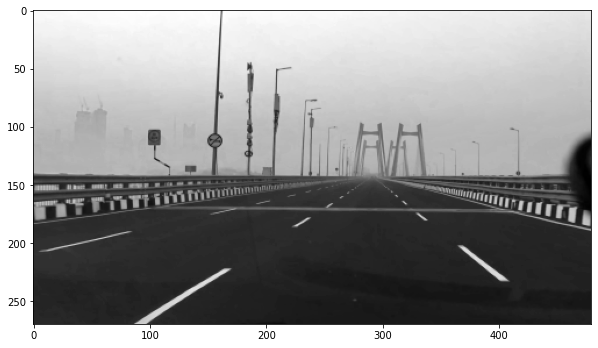

In [25]:
# specify frame index
idx = 100

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(col_images[idx][:,:,0], cmap= "gray")
plt.show()

**FRAME MASK CREATION**

In [26]:
# create a zero array
stencil = np.zeros_like(col_images[idx][:,:,0])

# specify coordinates of the polygon
polygon = np.array([[50,270], [220,160], [360,160], [480,270]])

# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

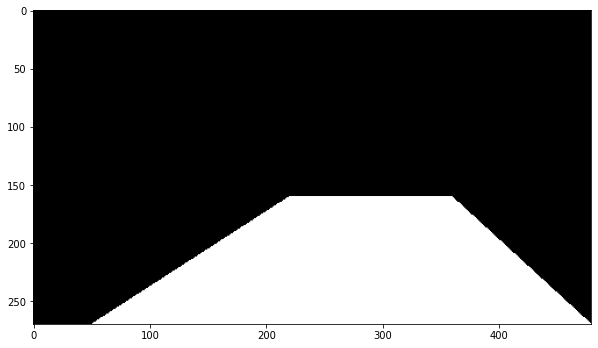

In [27]:
# plot polygon
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

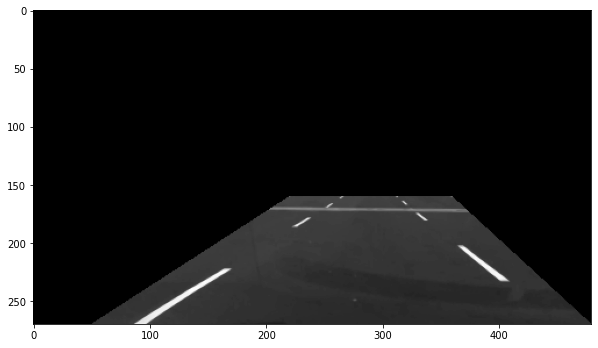

In [28]:
# apply polygon as a mask on the frame
img = cv2.bitwise_and(col_images[idx][:,:,0], col_images[idx][:,:,0], mask=stencil)

# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

### IMAGE PREPROCESSING

**IMAGE THRESHOLDING**

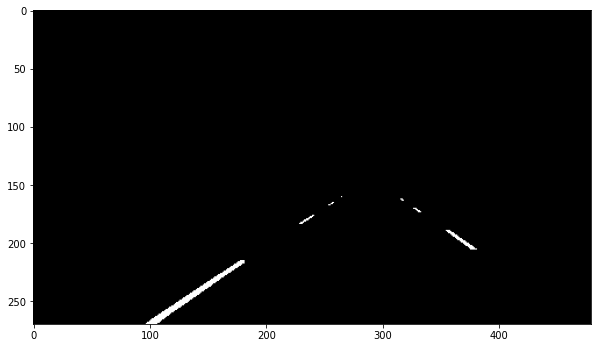

In [17]:
# apply image thresholding
ret, thresh = cv2.threshold(img, 130, 145, cv2.THRESH_BINARY)

# plot image
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

**HOUGH LINE TRANSFORMATION**

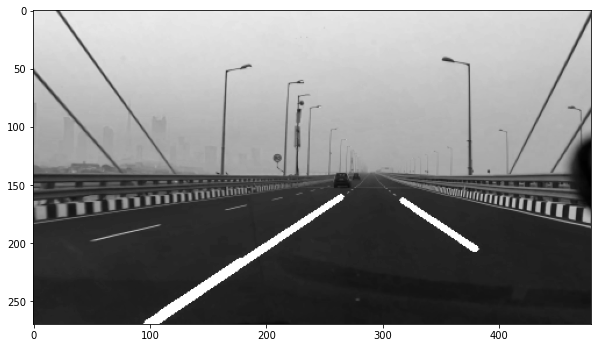

In [18]:
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)

# create a copy of the original frame
dmy = col_images[idx][:,:,0].copy()

# draw Hough lines
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

In [32]:
cnt = 0

for img in tqdm.notebook.tqdm(col_images, 'Applying Threshold and Hough'):
  
  # apply frame mask
  masked = cv2.bitwise_and(img[:,:,0], img[:,:,0], mask=stencil)
  
  # apply image thresholding
  ret, thresh = cv2.threshold(masked, 130, 145, cv2.THRESH_BINARY)

  # apply Hough Line Transformation
  lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
  dmy = img.copy()
  
  # Plot detected lines
  try:
    for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)
  
    cv2.imwrite('frames/'+str(cnt)+'.png',dmy)
  
  except TypeError: 
    cv2.imwrite('frames/'+str(cnt)+'.png',img)

  cnt+= 1

Applying Threshold and Hough:   0%|          | 0/1108 [00:00<?, ?it/s]

### VIDEO PREPARATION

In [33]:
# input frames path
pathIn= 'frames/'

# output path to save the video
pathOut = 'roads.mp4'

# specify frames per second
fps = 30.0

In [34]:
from os.path import isfile, join

# get file names of the frames
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [35]:

frame_list = []

for i in tqdm.notebook.tqdm(range(len(files))):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_list.append(img)

  0%|          | 0/1108 [00:00<?, ?it/s]

In [23]:
# write the video
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_list)):
    # writing to a image array
    out.write(frame_list[i])

out.release()